In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
datasets = ['lasry', 'vangalen', 'simillie']
tools = ['nn', 'cpdb', 'community']

In [3]:
# Function to read a single data file
def read_data(file_path):
    
    data = pd.read_csv(file_path, index_col=False)
    return data

In [4]:
# (case,control)
original_dataset = {"vangalen":(24,9),"lasry": (7,6), "simillie":(12,10)}

In [5]:
# Loop through each tool and dataset to read the files and get peak values

peak_values = {'Tool': [], 'Dataset': [], 'Number_of_case':[], 'Number_of_control':[], "Number of Samples": [], 'Peak_CPU': [], 'Peak_RAM_MB': [], 'Elapsed_time(min)':[]}

for tool in tools:
    for dataset in datasets:
        for file_name in os.listdir(f'./{tool}/'):  # Replace with actual path
            if dataset in file_name:
                # Parse number of case and control from file name
                
                if "full" in file_name:
                    num_case, num_control = original_dataset[dataset]
                else:
                    _, num_case, num_control = file_name.replace('.txt', '').split('_')[1:]
                    num_control = num_control.split('.')[0]
                # Read the data
                data = read_data(f'./{tool}/{file_name}') 
                
                num_case = int(num_case)
                num_control = int(num_control)
                
                # Append peak values to the dictionary
                peak_values['Tool'].append(tool)
                peak_values['Dataset'].append(dataset)
                peak_values['Number_of_case'].append(num_case)
                peak_values['Number_of_control'].append(num_control)
                peak_values["Number of Samples"].append(num_case + num_control)
                peak_values['Peak_CPU'].append(data.iloc[:, 1].max())
                peak_values['Peak_RAM_MB'].append(data.iloc[:, 3].max())
                peak_values['Elapsed_time(min)'].append(data['Elapsed_time'].max()/60)

In [6]:
peak_values = pd.DataFrame(peak_values)

In [7]:
tool_names = {"nn": "NicheNet",
             "cpdb": "CellPhoneDB",}

dataset_names = {"lasry":"Lasry",
                "simillie": "Simillie",
                "vangalen":"VanGalen"}

In [8]:
peak_values = peak_values.replace({"Tool": tool_names, "Dataset":dataset_names})

In [9]:
# Define a set of markers and colors for the tools
markers = ['o', 'D', 'X']
palette = {'NicheNet': '#cdad00', 'community': '#6e8b3d', 'CellPhoneDB': '#8b8878'}

In [10]:
palette_dataset = {'Lasry': '#cdad00', 'Simillie': '#6e8b3d', 'VanGalen': '#8b8878'}

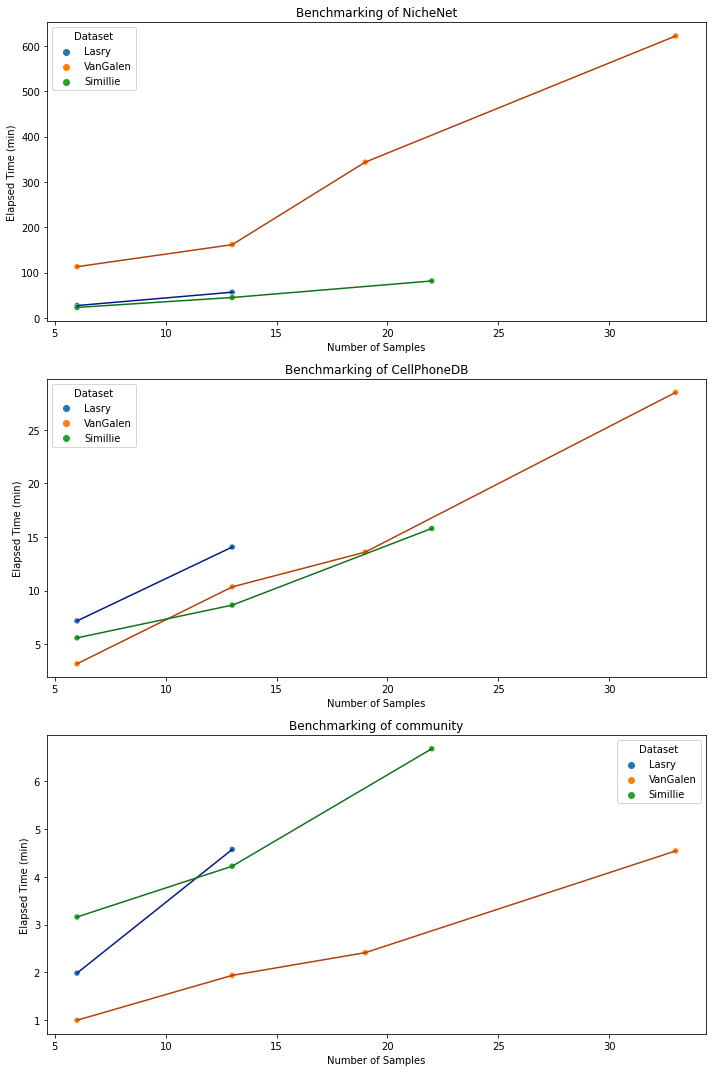

In [11]:
# Separate plots for each tool, focusing on "Number of Samples" and "Elapsed_time(min)"
tools = peak_values['Tool'].unique()

# subplots
fig, axes = plt.subplots(len(tools), 1, figsize=(10, 15))

# Loop each tool to create a separate plot
for i, tool in enumerate(tools):
    sns.scatterplot(data=peak_values[peak_values['Tool'] == tool], x="Number of Samples", y="Elapsed_time(min)", 
                    hue="Dataset", ax=axes[i], palette="tab10")
    
    
    sns.lineplot(peak_values[peak_values['Tool'] == tool], x="Number of Samples", y="Elapsed_time(min)", 
                 hue="Dataset", ax=axes[i], palette="dark", dashes=False ,legend=False)
    axes[i].set_title(f"Benchmarking of {tool}")
    axes[i].set_xlabel("Number of Samples")
    axes[i].set_ylabel("Elapsed Time (min)")

plt.tight_layout()
plt.show()


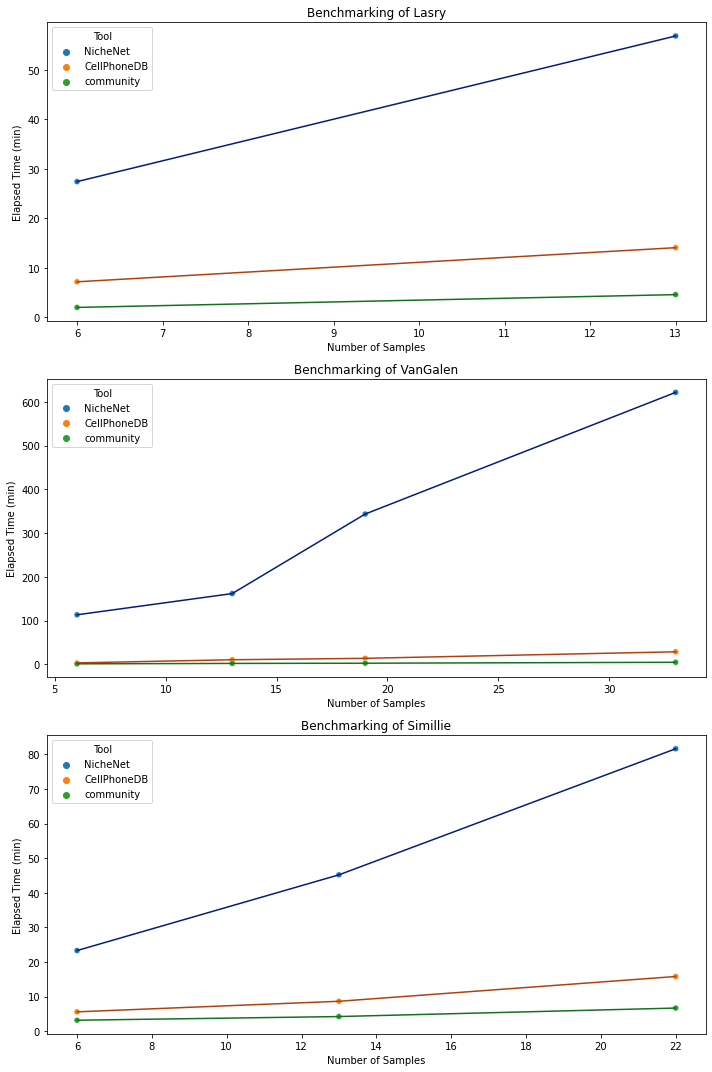

In [12]:
datasets = peak_values['Dataset'].unique()

# subplots
fig, axes = plt.subplots(len(datasets), 1, figsize=(10, 15))

# Loop each tool to create a separate plot
for i, dataset in enumerate(datasets):
    sns.scatterplot(data=peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
                    hue="Tool", ax=axes[i], palette="tab10")
    
    
    sns.lineplot(peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
                 hue="Tool", ax=axes[i], palette="dark", dashes=False ,legend=False)
    axes[i].set_title(f"Benchmarking of {dataset}")
    axes[i].set_xlabel("Number of Samples")
    axes[i].set_ylabel("Elapsed Time (min)")

plt.tight_layout()
plt.show()


In [13]:
# # Create subplots for log-scaled plots
# fig, axes = plt.subplots(len(tools), 1, figsize=(10, 15))

# # Loop each tool to create a separate plot with log10-scaled y-axis
# for i, dataset in enumerate(datasets):
    
#     sns.scatterplot(data=peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
#                     hue="Tool", ax=axes[i], palette="tab10")
    
    
#     sns.lineplot(data=peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
#                  hue="Tool", ax=axes[i], palette="dark", dashes=False, legend=False)
    
#     axes[i].set_yscale("log")
#     axes[i].set_title(f"Benchmarking of {dataset} (Log10-scaled Time)")
#     axes[i].set_xlabel("Number of Samples")
#     axes[i].set_ylabel("Log10(Elapsed Time) (min)")

# plt.tight_layout()
# plt.show()

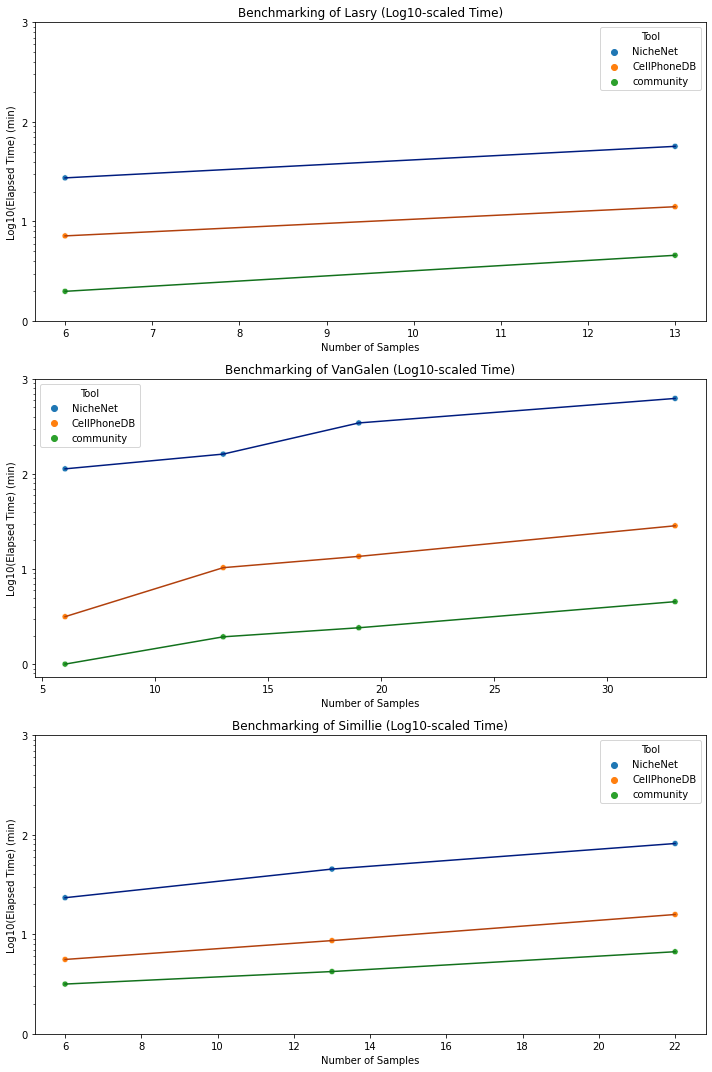

In [14]:
# Create subplots for log-scaled plots
fig, axes = plt.subplots(len(tools), 1, figsize=(10, 15))

# Loop each tool to create a separate plot with log10-scaled y-axis
for i, dataset in enumerate(datasets):
    sns.scatterplot(data=peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
                    hue="Tool", ax=axes[i], palette="tab10")
    
    
    sns.lineplot(data=peak_values[peak_values['Dataset'] == dataset], x="Number of Samples", y="Elapsed_time(min)", 
                 hue="Tool", ax=axes[i], palette="dark", dashes=False, legend=False)
    axes[i].set_yscale("log")
    axes[i].set_yticks([1, 10, 100, 1000])
    axes[i].get_yaxis().set_major_formatter(lambda x, _: '{:.0f}'.format(np.log10(x)))
    axes[i].set_title(f"Benchmarking of {dataset} (Log10-scaled Time)")
    axes[i].set_xlabel("Number of Samples")
    axes[i].set_ylabel("Log10(Elapsed Time) (min)")

plt.tight_layout()
plt.show()

In [15]:
peak_values.to_csv("peak_values_table.csv")